# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Clara Marsya Dekawanti
- **Email:** claramarsyaa@gmail.com
- **ID Dicoding:** MC009D5X2450

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dalam dua tahun terakhir?
- Kapan waktu paling banyak dan paling sepi untuk penyewaan sepeda?
- Bagaimana pengaruh faktor cuaca (temperatur, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi jumlah penyewaan sepeda perhari. Dataset hour.csv berisi jumlah penyewaan sepeda perjam.
- Kedua dataset memiliki kolom utama yang mirip seperti tanggal, musim (season), cuaca(weathersit), suhu(temp), kelembaban(hum), dan kecepatan angin(windspeed).
- Kolom cnt menunjukkan jumlah total sepeda yang disewa pada hari itu (perhari atau perjam).
- Kolom casual (penyewa tidak terdaftar) dan registered(penyewa terdaftar).

### Assessing Data

#### Menilai tabel day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Perlu merubah tipe data kolom **dteday** dari object ke **datetime**.
- Data lainnya sudah bersih, tanpa missing values atau duplikasi.
- Pada dataset hour_df ada keanehan yaitu banyak kolom windspeed bernilai 0.

### Cleaning Data

#### Memperbaiki tipe data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Memperbaiki nilai 0 pada kolom windspeed

In [14]:
# Hitung jumlah dan persentase nilai windspeed = 0
zero_windspeed = hour_df[hour_df["windspeed"] == 0]
print("Jumlah data dengan windspeed = 0:", len(zero_windspeed))
print("Persentase data dengan windspeed = 0:", (len(zero_windspeed) / len(hour_df)) * 100, "%")


Jumlah data dengan windspeed = 0: 2180
Persentase data dengan windspeed = 0: 12.543874791414927 %


Ganti windspeed = 0 dengan median berdasarkan weathersit, karena cuaca memengaruhi kecepatan angin.

In [15]:
# Menghitung median windspeed berdasarkan kondisi cuaca (weathersit)
median_windspeed = hour_df.groupby("weathersit")["windspeed"].median()

# Mengganti nilai 0 dengan median dari weathersit masing-masing
hour_df.loc[hour_df["windspeed"] == 0, "windspeed"] = hour_df["weathersit"].map(median_windspeed)

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.194,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.194,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.194,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.194,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.194,0,1,1


**Insight:**
- Setelah mengubah tipe data kolom **dteday** menjadi **datetime**, sekarang sudah bisa melakukan analisis berdasarkan waktu
- Setelah perbaikan isi kolom **windspeed**, distribusi angin lebih normal dan realistis.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [17]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
145,146,2011-05-26,2,0,5,0,4,1,1,0.708333,0.654688,0.677500,0.199642,758,3919,4677
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141


In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
print("\nStatistik Peminjaman Berdasarkan Musim:")

# Mapping season number ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Mengganti angka season dengan nama musim
day_df["season"] = day_df["season"].map(season_mapping)

# Mengelompokkan data berdasarkan season dan menghitung statistik peminjaman
print(day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
}))


Statistik Peminjaman Berdasarkan Musim:
         cnt                                
         max   min         mean          std
season                                      
Fall    8714  1115  5644.303191  1459.800381
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Winter  8555    22  4728.162921  1699.615261


In [20]:
print("\nStatistik Peminjaman Berdasarkan Kondisi Cuaca:")
print(day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
}))


Statistik Peminjaman Berdasarkan Kondisi Cuaca:
             cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449


In [21]:
print("\nTotal Peminjaman Berdasarkan Hari Kerja:")
print(day_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False))


Total Peminjaman Berdasarkan Hari Kerja:
workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [22]:
# Mapping angka weekday ke nama hari
day_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu:")
print(day_df.groupby(day_df['weekday'].map(day_map))['cnt'].sum().sort_values(ascending=False))


Total Peminjaman Berdasarkan Hari dalam Seminggu:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [23]:
print("\nTotal Peminjaman Berdasarkan Hari Libur:")
print(day_df.groupby(by="holiday")["cnt"].sum().sort_values(ascending=False))


Total Peminjaman Berdasarkan Hari Libur:
holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [24]:
print("\nTotal Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:")

# Mengelompokkan berdasarkan workingday, lalu menjumlahkan casual dan registered
workingday_rentals = day_df.groupby("workingday")[["casual", "registered"]].sum()

# Mengubah label workingday menjadi lebih mudah dibaca
workingday_rentals.index = workingday_rentals.index.map({0: "Hari Libur/Weekend", 1: "Hari Kerja"})

print(workingday_rentals)


Total Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:
                    casual  registered
workingday                            
Hari Libur/Weekend  316732      683537
Hari Kerja          303285     1989125


In [25]:
print("\nTotal Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):")
weekly_rentals = day_df.groupby("weekday")[["casual", "registered"]].sum().reset_index()

# Mapping angka weekday ke nama hari
day_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
weekly_rentals["weekday"] = weekly_rentals["weekday"].map(day_mapping)

# Mengurutkan berdasarkan Senin-Minggu
weekly_rentals = weekly_rentals.set_index("weekday").reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

print(weekly_rentals)


Total Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):
           casual  registered
weekday                      
Monday     140521      303506
Tuesday     70784      384719
Wednesday   57843      411266
Thursday    57319      415729
Friday      61460      423935
Saturday    78238      409552
Sunday     153852      323955


In [26]:
print("\n Total Peminjaman Setiap Bulan Dalam Setiap Tahun: ")
# Mengelompokkan data berdasarkan tahun dan bulan lalu menjumlahkan total peminjaman (cnt)
monthly_rentals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Mengubah nilai kolom 'yr' menjadi tahun yang lebih mudah dibaca (0 = 2011, 1 = 2012)
monthly_rentals['yr'] = monthly_rentals['yr'].map({0: 2011, 1: 2012})

# Mengubah angka bulan menjadi nama bulan
monthly_rentals['mnth'] = monthly_rentals['mnth'].apply(lambda x: calendar.month_abbr[x])

print(monthly_rentals)


 Total Peminjaman Setiap Bulan Dalam Setiap Tahun: 
      yr mnth     cnt
0   2011  Jan   38189
1   2011  Feb   48215
2   2011  Mar   64045
3   2011  Apr   94870
4   2011  May  135821
5   2011  Jun  143512
6   2011  Jul  141341
7   2011  Aug  136691
8   2011  Sep  127418
9   2011  Oct  123511
10  2011  Nov  102167
11  2011  Dec   87323
12  2012  Jan   96744
13  2012  Feb  103137
14  2012  Mar  164875
15  2012  Apr  174224
16  2012  May  195865
17  2012  Jun  202830
18  2012  Jul  203607
19  2012  Aug  214503
20  2012  Sep  218573
21  2012  Oct  198841
22  2012  Nov  152664
23  2012  Dec  123713


### Explore hour_df

In [27]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7492,7493,2011-11-13,4,0,11,19,0,0,0,1,0.50,0.4848,0.29,0.3582,36,121,157
1841,1842,2011-03-22,2,0,3,11,0,2,1,1,0.44,0.4394,0.51,0.3284,22,64,86
6079,6080,2011-09-15,3,0,9,21,0,4,1,1,0.46,0.4545,0.63,0.3284,11,134,145
8206,8207,2011-12-13,4,0,12,14,0,2,1,1,0.40,0.4091,0.37,0.2537,18,116,134
5262,5263,2011-08-12,3,0,8,4,0,5,1,1,0.62,0.6212,0.53,0.1343,0,5,5


In [28]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.213455,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.099557,49.305030,151.357286,181.387599


In [29]:
print("\nStatistik Peminjaman Berdasarkan Musim:")

# Mapping season number ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Mengganti angka season dengan nama musim
hour_df["season"] = hour_df["season"].map(season_mapping)

# Mengelompokkan data berdasarkan season dan menghitung statistik peminjaman
print(hour_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
}))


Statistik Peminjaman Berdasarkan Musim:
        cnt                            
        max min        mean         std
season                                 
Fall    977   1  236.016237  197.711630
Spring  801   1  111.114569  119.224010
Summer  957   1  208.344069  188.362473
Winter  967   1  198.868856  182.967972


In [30]:
print("\n Jam Penyewaan Sepeda Terbanyak Dalam Satu Hari: ")
hour_df.groupby("hr")["cnt"].sum().sort_values(ascending=False)


 Jam Penyewaan Sepeda Terbanyak Dalam Satu Hari: 


,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [31]:
print("\n Penyewaan Sepeda per Jam Berdasarkan Tahun: ")
hour_df.groupby(["yr", "hr"])["cnt"].sum().unstack()


 Penyewaan Sepeda per Jam Berdasarkan Tahun: 


hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
yr,,,,,,,,,,,,,,,,,,,,,
0,15540,9558,6661,3441,1817,5157,20801,56930,95467,59486,...,66482,68590,85622,127632,116985,85802,62818,48875,37677,25116
1,23590,14606,9691,4733,2611,9104,34331,97241,165534,99952,...,109170,114559,142126,209228,192787,140987,101732,76570,57935,38825


In [32]:
print("\n Penyewaan Sepeda per Jam Berdasarkan Hari Kerja atau Libur: ")
hour_df.groupby(["workingday", "hr"])["cnt"].sum().unstack()


 Penyewaan Sepeda per Jam Berdasarkan Hari Kerja atau Libur: 


hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
workingday,,,,,,,,,,,,,,,,,,,,,
0,20884,15987,12123,5851,1876,1929,4292,10027,24406,39645,...,84233,82886,81480,74740,64643,53285,40190,32674,26694,19764
1,18246,8177,4229,2323,2552,12332,50840,144144,236595,119793,...,91419,100263,146268,262120,245129,173504,124360,92771,68918,44177


### Explore all data

#### Menghubungkan semua data

In [33]:
all_df = pd.concat([day_df.assign(source="day"), hour_df.assign(source="hour")], ignore_index=True)
print(all_df.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01  Spring   0     1        0        6           0   
1        2 2011-01-02  Spring   0     1        0        0           0   
2        3 2011-01-03  Spring   0     1        0        1           1   
3        4 2011-01-04  Spring   0     1        0        2           1   
4        5 2011-01-05  Spring   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt source  hr  
0   985    day NaN  
1   801    day NaN  
2  1349    day NaN  
3  1562 

In [34]:
print("\nTotal Peminjaman Berdasarkan Musim & Jenis Pengguna:")
print(all_df.groupby(["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}))


Total Peminjaman Berdasarkan Musim & Jenis Pengguna:
        casual  registered      cnt
season                             
Fall    452182     1670076  2122258
Spring  121244      821452   942696
Summer  407044     1430134  1837178
Winter  259564     1423662  1683226


In [35]:
print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu & Jenis Pengguna:")

# Mapping angka ke nama hari
day_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
               4: "Thursday", 5: "Friday", 6: "Saturday"}

all_df["weekday"] = all_df["weekday"].map(day_mapping)

# Menampilkan total peminjaman berdasarkan hari
print(all_df.groupby(["weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}))


Total Peminjaman Berdasarkan Hari dalam Seminggu & Jenis Pengguna:
           casual  registered     cnt
weekday                              
Friday     156476      819104  975580
Monday     141568      769438  911006
Saturday   307704      647910  955614
Sunday     281042      607012  888054
Thursday   122920      847870  970790
Tuesday    115686      822532  938218
Wednesday  114638      831458  946096


In [36]:
print("\nTotal Peminjaman Berdasarkan Jam dalam Sehari:")
print(hour_df.groupby(["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False))


Total Peminjaman Berdasarkan Jam dalam Sehari:
    hr  casual  registered     cnt
17  17   54220      282640  336860
18  18   44496      265276  309772
8    8   15761      245240  261001
16  16   53834      173914  227748
19  19   35505      191284  226789
13  13   52713      132206  184919
12  12   49718      134696  184414
15  15   54606      128543  183149
14  14   55089      120563  175652
20  20   26378      138172  164550
9    9   22458      136980  159438
7    7    8037      146134  154171
11  11   43286      108034  151320
10  10   33789       92468  126257
21  21   20570      104875  125445
22  22   16200       79412   95612
23  23   11065       52876   63941
6    6    3017       52115   55132
0    0    7375       31755   39130
1    1    4709       19455   24164
2    2    3412       12940   16352
5    5    1012       13249   14261
3    3    1893        6281    8174
4    4     874        3554    4428


**Insight:**
- Penyewaan meningkat di tahun 2012 dibandingkan 2011, menunjukkan tren pertumbuhan pengguna layanan bike-sharing.
- workingday=1 (hari kerja) memiliki jumlah penyewaan lebih tinggi, menandakan banyak pengguna sepeda untuk keperluan komuter.
- Jumlah peminjaman pada Fall season (musim gugur) lebih tinggi dibanding musim lainnya.
- Puncak peminjaman terjadi pada jam 08:00 dan 17:00, yang sesuai dengan jam berangkat dan pulang kerja.
- weathersit 3 atau 4 (cuaca buruk) mengurangi jumlah peminjaman secara drastis.
- Pengguna registered (terdaftar) lebih dominan dibandingkan pengguna casual (tidak terdaftar).
- Pengguna casual meningkat signifikan pada akhir pekan, sedangkan pengguna registered tetap stabil sepanjang minggu.
Ini menunjukkan bahwa pelanggan terdaftar lebih sering menggunakan layanan untuk keperluan harian, sedangkan pengguna casual lebih banyak memanfaatkan layanan untuk rekreasi di akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam dua tahun terakhir?

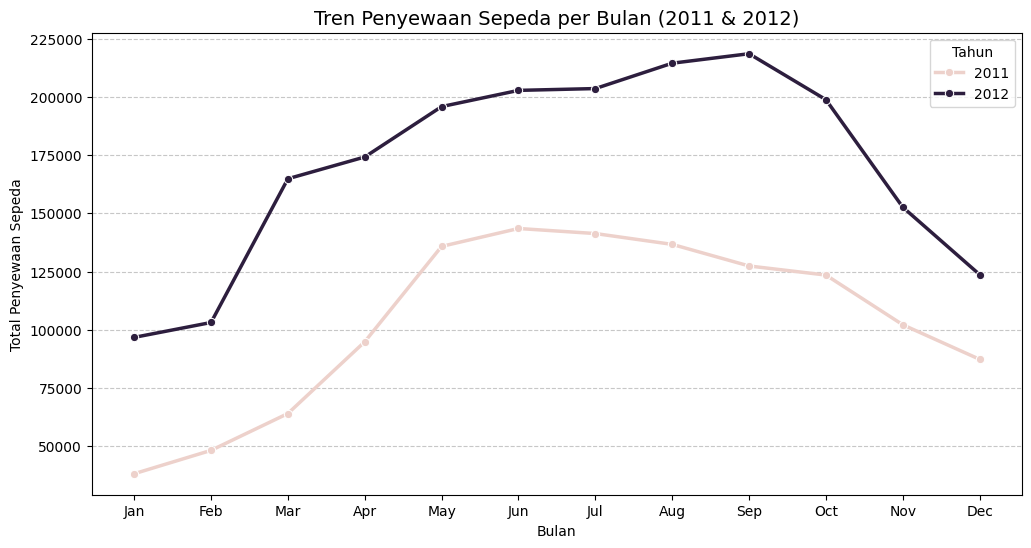

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Memfilter hanya data dari sumber "day"
day_df = all_df[all_df["source"] == "day"]

# Mengelompokkan data berdasarkan tahun dan bulan
monthly_trend = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Mengubah angka tahun (0: 2011, 1: 2012) menjadi tahun sebenarnya
monthly_trend['yr'] = monthly_trend['yr'].map({0: 2011, 1: 2012})

# Mengubah angka bulan menjadi nama bulan
monthly_trend['mnth'] = monthly_trend['mnth'].apply(lambda x: calendar.month_abbr[x])

# Plot data tren penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="mnth", y="cnt", hue="yr", marker="o", linewidth=2.5)

plt.title("Tren Penyewaan Sepeda per Bulan (2011 & 2012)", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.legend(title="Tahun")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- Jumlah penyewaan meningkat selama bulan Juni–September.
- Penyewaan menurun drastis pada bulan Desember–Februari.
- Tren penyewaan tahun 2012 lebih tinggi dibandingkan tahun 2011.

### Pertanyaan 2: Kapan waktu paling banyak dan paling sepi untuk penyewaan sepeda?

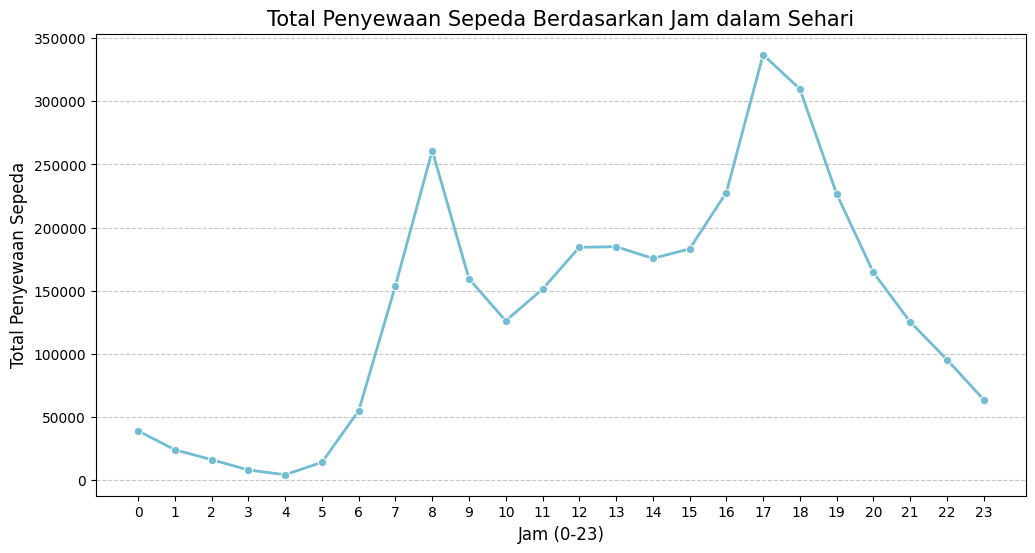

In [38]:
# Mengelompokkan data berdasarkan jam dan menjumlahkan total penyewaan sepeda
hourly_trend = hour_df.groupby("hr")["cnt"].sum().reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_trend["hr"], y=hourly_trend["cnt"], marker='o', color="#72BCD4", linewidth=2)

# Menambahkan detail grafik
plt.title("Total Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=15)
plt.xlabel("Jam (0-23)", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

- Jam sibuk (peak hours) biasanya terjadi saat orang berangkat dan pulang kerja (sekitar 07:00 - 09:00 & 17:00 - 19:00).
- Jam sepi terjadi pada larut malam hingga dini hari (sekitar 00:00 - 05:00).

### Pertanyaan 3: Bagaimana pengaruh faktor cuaca (temperatur, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda?

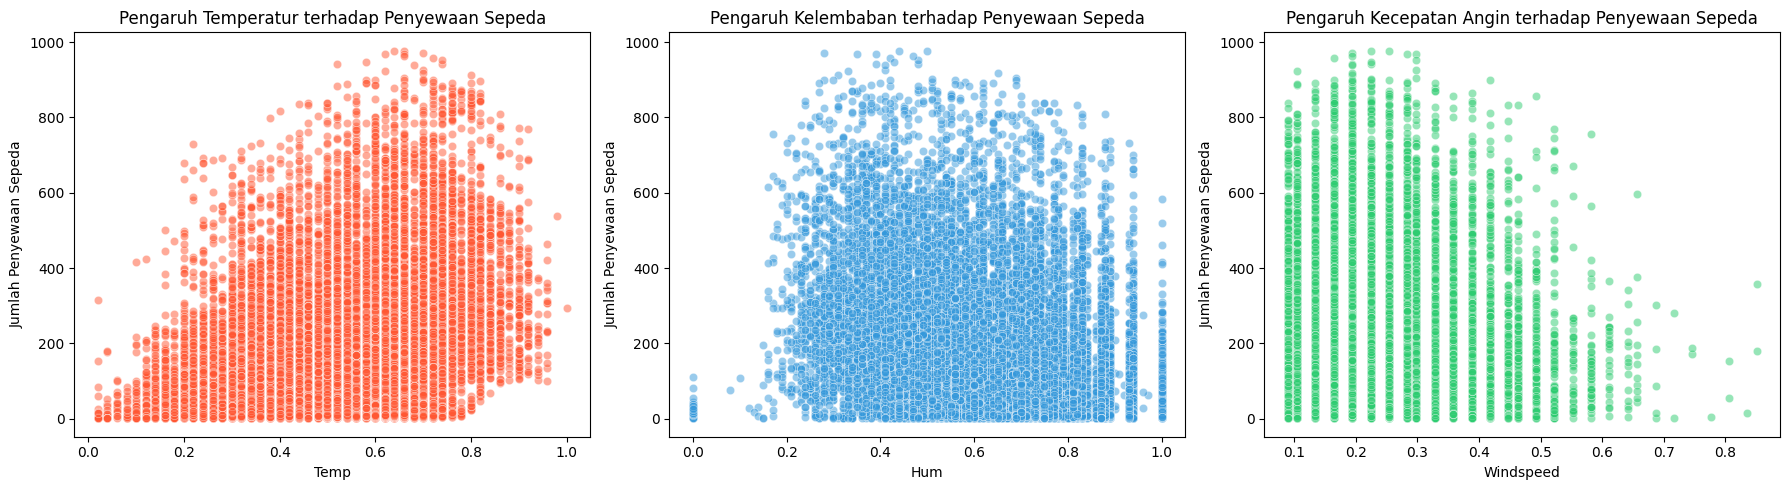

In [39]:
# Membuat figure dengan 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Temperatur vs. Penyewaan Sepeda
sns.scatterplot(ax=axes[0], x=hour_df["temp"], y=hour_df["cnt"], alpha=0.5, color="#FF5733")
axes[0].set_title("Pengaruh Temperatur terhadap Penyewaan Sepeda", fontsize=12)
axes[0].set_xlabel("Temp", fontsize=10)
axes[0].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=10)

# Scatter plot: Kelembaban vs. Penyewaan Sepeda
sns.scatterplot(ax=axes[1], x=hour_df["hum"], y=hour_df["cnt"], alpha=0.5, color="#3498DB")
axes[1].set_title("Pengaruh Kelembaban terhadap Penyewaan Sepeda", fontsize=12)
axes[1].set_xlabel("Hum", fontsize=10)
axes[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=10)

# Scatter plot: Kecepatan Angin vs. Penyewaan Sepeda
sns.scatterplot(ax=axes[2], x=hour_df["windspeed"], y=hour_df["cnt"], alpha=0.5, color="#2ECC71")
axes[2].set_title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda", fontsize=12)
axes[2].set_xlabel("Windspeed", fontsize=10)
axes[2].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=10)

# Menyesuaikan layout agar tidak bertabrakan
plt.tight_layout()
plt.show()

- Semakin tinggi temperatur (sekitar 0.6 - 0.8), semakin banyak penyewaan sepeda. Namun, setelah mencapai batas tertentu (mendekati 1.0), jumlah penyewaan cenderung menurun, kemungkinan karena suhu terlalu panas sehingga kurang nyaman untuk bersepeda.
- Pada tingkat kelembaban rendah hingga sedang (0.2 - 0.6), penyewaan sepeda cukup tinggi.
Pada kelembaban yang sangat tinggi (mendekati 1.0), jumlah penyewaan cenderung menurun.
Ini menunjukkan bahwa kelembaban ekstrem mungkin tidak disukai oleh pengguna sepeda, mungkin karena kondisi udara yang terlalu lembap membuat aktivitas fisik menjadi kurang nyaman.
- Terlihat bahwa kecepatan angin yang rendah hingga sedang (0.1 - 0.4) masih memiliki jumlah penyewaan yang tinggi.
Namun, jika kecepatan angin meningkat di atas 0.5 - 0.6, jumlah penyewaan mulai berkurang.
Ini masuk akal karena bersepeda di kondisi angin kencang bisa lebih sulit dan kurang nyaman, sehingga orang lebih memilih untuk tidak menyewa sepeda saat angin terlalu kuat.

## Conclusion

- Conclution pertanyaan 1: Bagaimana tren penyewaan sepeda dalam dua tahun terakhir?

Jumlah penyewaan sepeda mengalami peningkatan signifikan dari tahun 2011 ke 2012. Terdapat beberapa bulan dengan jumlah penyewaan yang lebih tinggi dibandingkan bulan lainnya. Penyewaan sepeda mencapai angka tertinggi pada bulan-bulan tertentu, yang kemungkinan berhubungan dengan faktor cuaca atau kondisi lingkungan yang lebih mendukung untuk bersepeda. Beberapa bulan menunjukkan penurunan signifikan dalam jumlah penyewaan, yang bisa disebabkan oleh faktor eksternal seperti kondisi cuaca kurang mendukung.

- Conclution pertanyaan 2: Kapan waktu paling ramai dan paling sepi untuk penyewaan sepeda?

1. Waktu Paling Ramai untuk Penyewaan

- Jumlah penyewaan sepeda cenderung meningkat pada jam sibuk, terutama di pagi dan sore hari.
- Peningkatan ini kemungkinan disebabkan oleh aktivitas berangkat dan pulang kerja atau sekolah, di mana banyak orang menggunakan sepeda sebagai alat transportasi.
- Selain itu, terdapat lonjakan penyewaan pada hari tertentu dalam seminggu, seperti akhir pekan, yang mungkin terkait dengan aktivitas rekreasi.
2. Waktu Paling Sepi untuk Penyewaan

- Jumlah penyewaan sepeda cenderung menurun pada larut malam hingga dini hari, kemungkinan karena waktu orang-orang beristirahat dan keamanan saat bersepeda pada waktu tersebut.
- Selain itu, pada hari kerja, jumlah penyewaan bisa lebih rendah pada siang hari, saat kebanyakan orang masih berada di tempat kerja atau sekolah.

- Conclution pertanyaan 3: Bagaimana pengaruh faktor cuaca (temperatur, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda?

1. Temperatur

- Semakin tinggi temperatur, jumlah penyewaan sepeda cenderung meningkat, tetapi hanya sampai titik tertentu. Cuaca yang terlalu dingin atau terlalu panas dapat menyebabkan penurunan jumlah penyewaan, karena kondisi tersebut mungkin kurang nyaman bagi pengguna sepeda.
2. Kelembaban

- Kelembaban yang lebih tinggi cenderung mengakibatkan jumlah penyewaan yang lebih rendah. Hal ini mungkin disebabkan oleh ketidaknyamanan saat bersepeda dalam kondisi udara yang terlalu lembab.
3. Kecepatan Angin

- Peningkatan kecepatan angin cenderung berdampak negatif pada jumlah penyewaan sepeda. Angin yang terlalu kencang dapat membuat bersepeda menjadi lebih sulit dan kurang aman, sehingga orang lebih memilih alternatif transportasi lain.

In [40]:
all_df.to_csv("all_data.csv", index=False)